# Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Creaye data
from sklearn.datasets import make_circles

# 1000 circles
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

## Function to visualise predictions of the model

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # create x values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # make predictions
    y_pred = model.predict(x_in)
    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi-class classification")
        # so, we re-shaping our pred for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Non-linear models

## Model 1

In [4]:
# Create a model
model_nl1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_nl1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history1 = model_nl1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3694 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3130 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2775 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2552 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2141 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1550 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1460 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1455 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1452 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1449 - accuracy: 0.4720
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


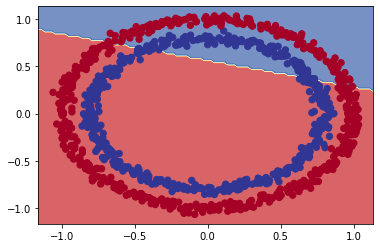

In [5]:
plot_decision_boundary(model_nl1, X, y)

## Model 2

In [6]:
# Create a model
model_nl2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_nl2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
model_nl2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 3.6388 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 2.5860 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 1.3694 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2313 - accuracy: 0.4520
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1932 - accuracy: 0.4350
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1627 - accuracy: 0.4400
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1366 - accuracy: 0.4470
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1136 - accuracy: 0.4520
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0935 - accuracy: 0.4520
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0749 - accuracy: 0.4490
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


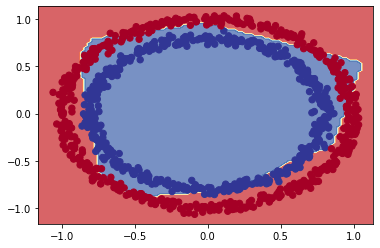

In [7]:
plot_decision_boundary(model_nl2, X, y)

## Model 3

In [8]:
# Create a model
model_nl3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history3 = model_nl3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6899 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5100
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5180
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5210
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5270
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5250
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5350
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5450
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5420
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


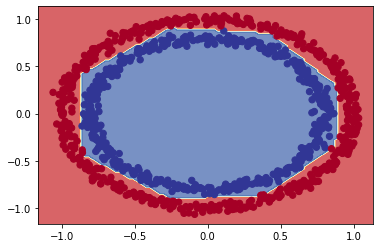

In [9]:
plot_decision_boundary(model_nl3, X, y)

## Model evaluation

In [10]:
# Mock tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

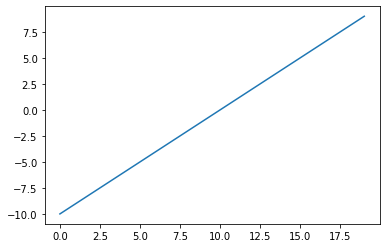

In [11]:
plt.plot(A)

In [13]:
# Replicating sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

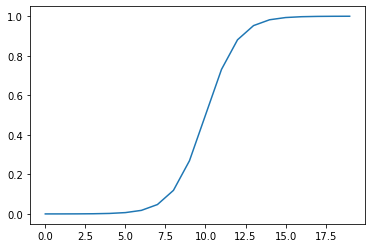

In [14]:
# Apply sigmoid to mock tensor and plot it
plt.plot(sigmoid(A))